### Task 2

Custom Hash Function Collisions: 900
Built-in Hash Function Collisions: 900


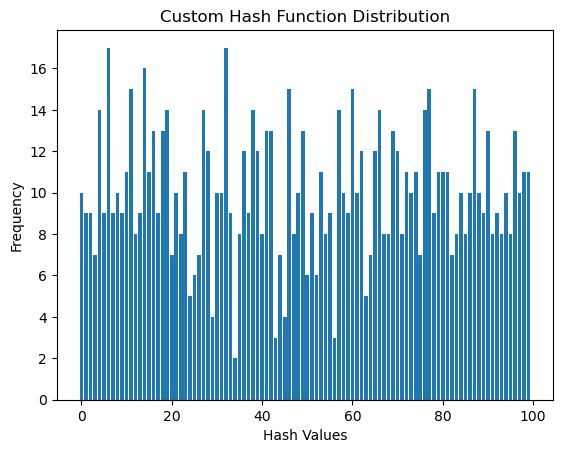

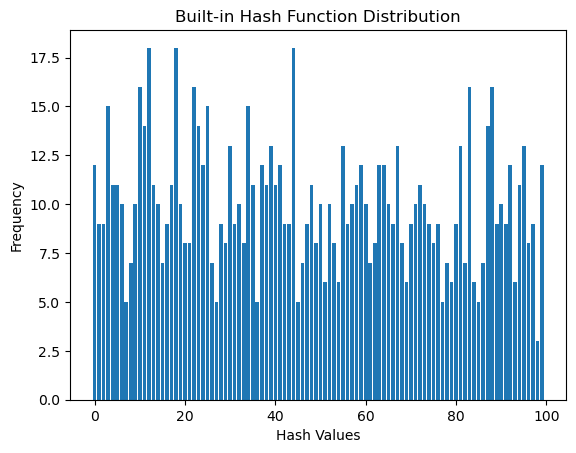

In [2]:
from collections import defaultdict
import random
import string

import matplotlib.pyplot as plt

# Custom hash function
def custom_hash(key, table_size=100):
    return sum(ord(c) for c in key) % table_size

# Generate a large dataset of random strings
def generate_dataset(size, string_length=8):
    dataset = [''.join(random.choices(string.ascii_letters + string.digits, k=string_length)) for _ in range(size)]
    return dataset

# Analyze collisions
def analyze_collisions(hash_function, dataset, table_size=100):
    hash_table = defaultdict(list)
    collisions = 0

    for key in dataset:
        hash_value = hash_function(key, table_size)
        if hash_value in hash_table:
            collisions += 1
        hash_table[hash_value].append(key)

    return collisions, hash_table

# Plot histogram of hash values
def plot_hash_distribution(hash_table, title):
    hash_values = list(hash_table.keys())
    frequencies = [len(hash_table[key]) for key in hash_values]

    plt.bar(hash_values, frequencies)
    plt.title(title)
    plt.xlabel("Hash Values")
    plt.ylabel("Frequency")
    plt.show()

# Main function
def main():
    dataset_size = 1000
    table_size = 100
    dataset = generate_dataset(dataset_size)

    # Analyze custom hash function
    custom_collisions, custom_hash_table = analyze_collisions(custom_hash, dataset, table_size)
    print(f"Custom Hash Function Collisions: {custom_collisions}")

    # Analyze Python's built-in hash function
    built_in_collisions, built_in_hash_table = analyze_collisions(lambda key, size: hash(key) % size, dataset, table_size)
    print(f"Built-in Hash Function Collisions: {built_in_collisions}")

    # Plot distributions
    plot_hash_distribution(custom_hash_table, "Custom Hash Function Distribution")
    plot_hash_distribution(built_in_hash_table, "Built-in Hash Function Distribution")

if __name__ == "__main__":
    main()